In [2]:
from Functions import *

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('DATA/Mall_Customers.csv')

In [5]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(data.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [8]:
data.describe(exclude='number')

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile_report.html")

# Display the report in a Jupyter Notebook 
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data_analisys =  data.copy()
data_analisys = data_analisys.drop('CustomerID',axis=1)

In [11]:
data_analisys.select_dtypes('number').corr(method="spearman")

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.019767,-0.34494
Annual Income (k$),0.019767,1.000000,0.00784
Spending Score (1-100),-0.344940,0.007840,1.00000


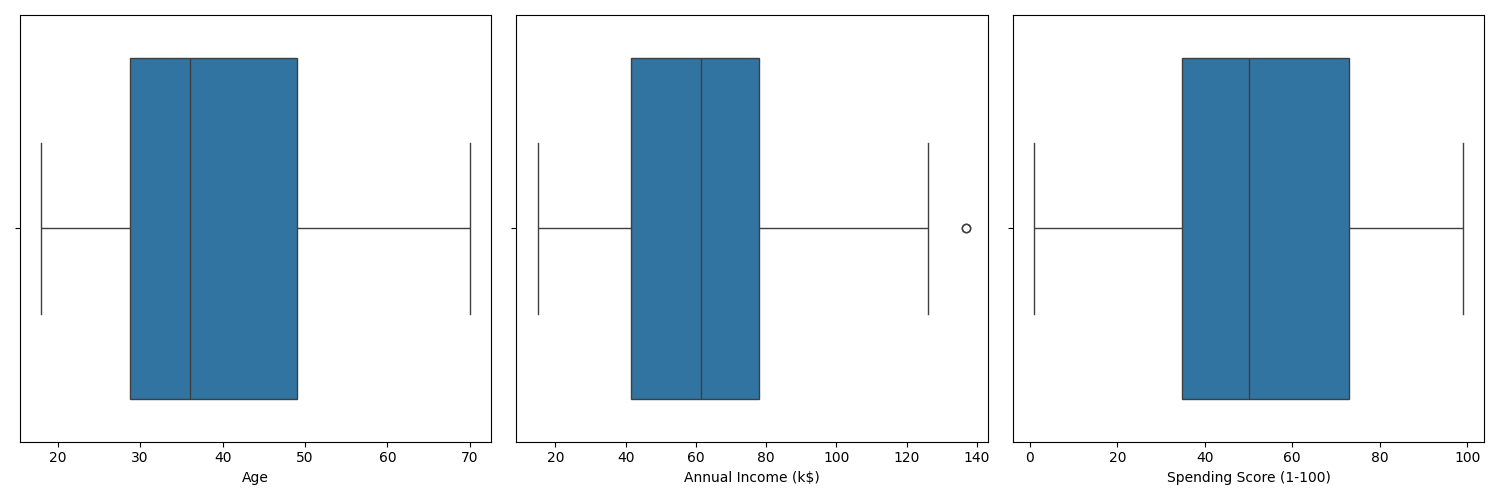

In [12]:

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))


numeric_cols = data_analisys.select_dtypes('number').columns

for ax, col in zip(axs, numeric_cols):
    sns.boxplot(data=data_analisys, x=col, ax=ax)

plt.tight_layout()

plt.show()

In [13]:
data_analisys.loc[data_analisys['Annual Income (k$)'] >130]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
199,Male,30,137,83


In [14]:
# Apenas o sexo masculino possui outliers na coluna Annual Income (k$)

[<Axes: > <Axes: > <Axes: >]
Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


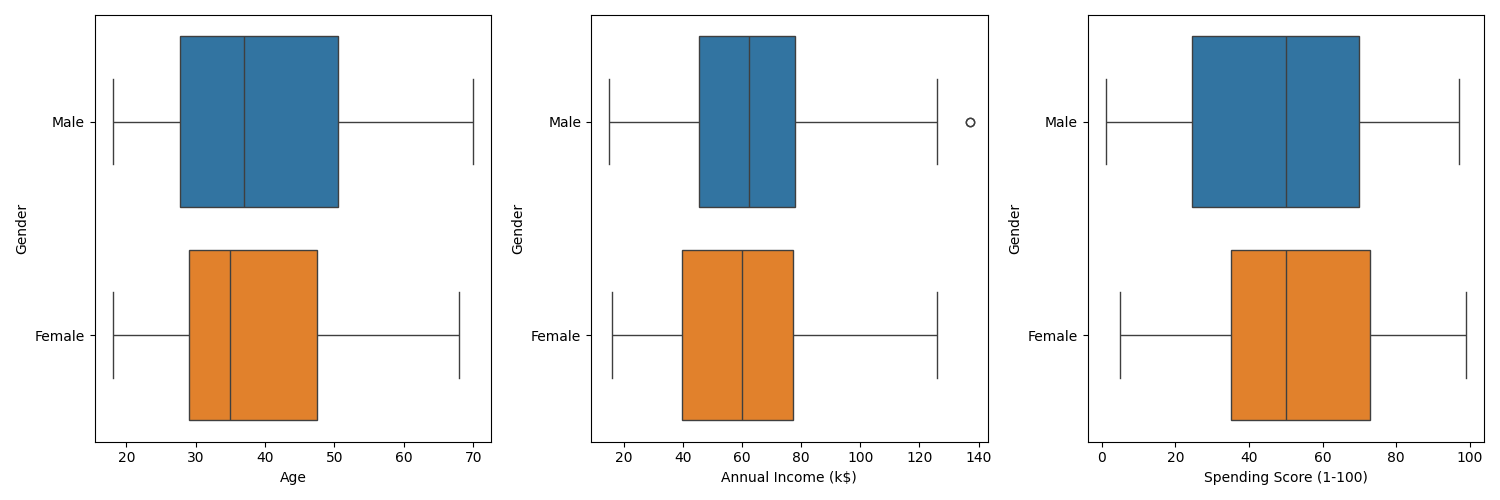

In [15]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
print(axs)
print(numeric_cols)

numeric_cols = data_analisys.select_dtypes('number').columns

for ax, col in zip(axs, numeric_cols):
    sns.boxplot(data=data_analisys, x=col, y='Gender',hue="Gender",ax=ax)

plt.tight_layout()

plt.show()

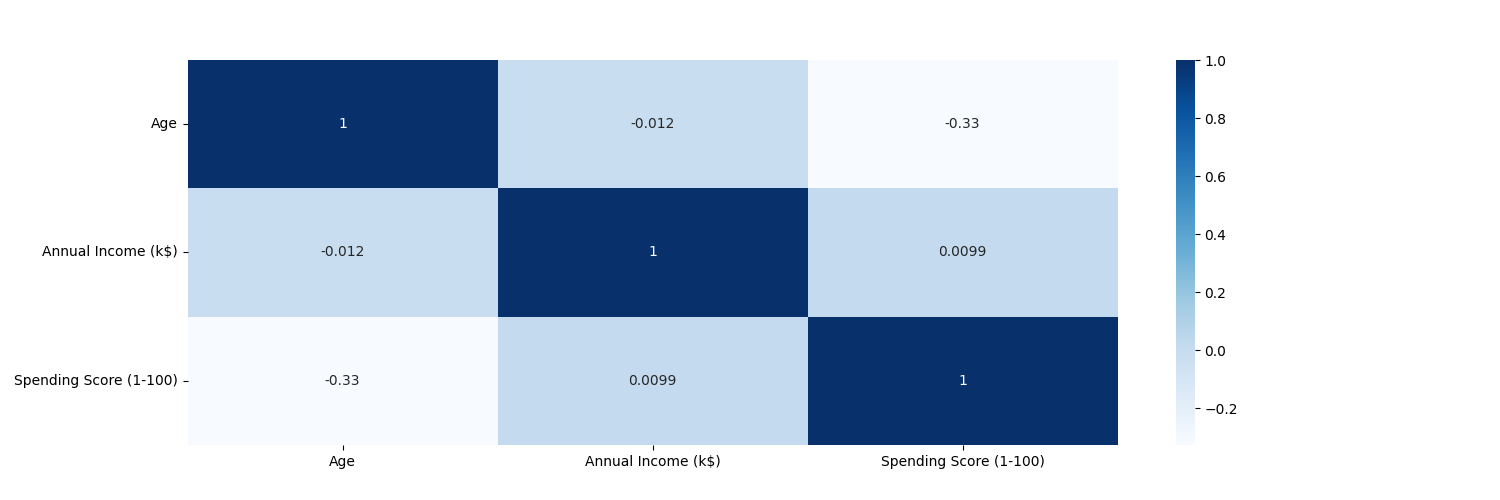

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(data_analisys.drop('Gender',axis=1).corr(),annot=True,cmap='Blues');
plt.show()

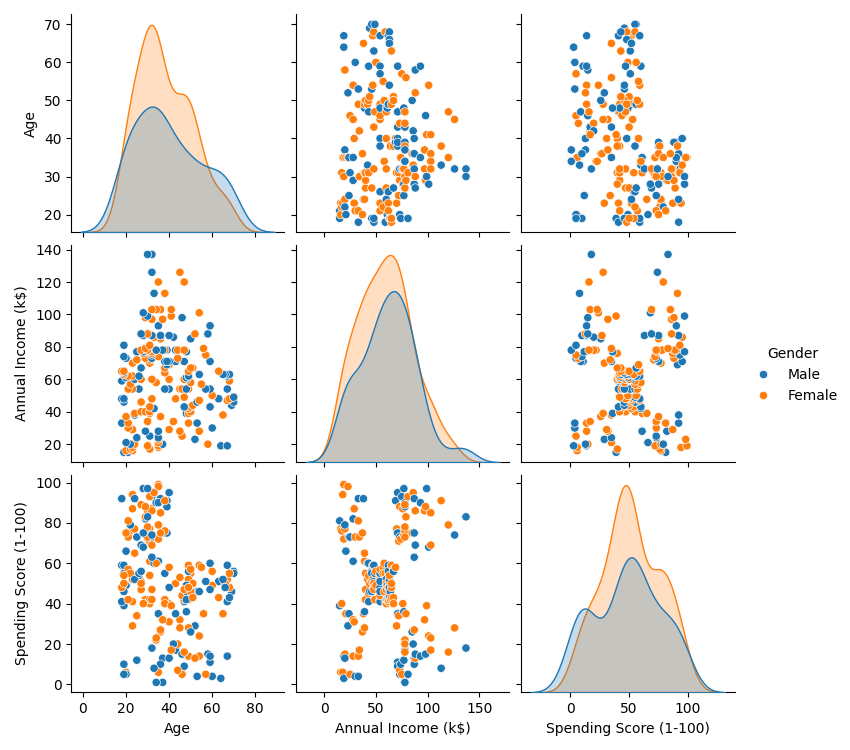

In [17]:
sns.pairplot(data_analisys,hue='Gender');
plt.show()

In [18]:
data_analisys.to_csv('mall_customers_no_id',index=False)

In [19]:
preprossecing = ColumnTransformer(
    [
        ('Standard',StandardScaler() ,['Age', 'Annual Income (k$)', 'Spending Score (1-100)']),
        ('Onehot',OneHotEncoder(),['Gender'])
    ]
) 

preprossecing.fit_transform(data_analisys)

data_analisys_scaled = pd.DataFrame(preprossecing.fit_transform(data_analisys),columns=preprossecing.get_feature_names_out())

In [20]:
data_analisys_scaled.head()

,Standard__Age,Standard__Annual Income (k$),Standard__Spending Score (1-100),Onehot__Gender_Female,Onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [21]:
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_features = ['Gender']

In [22]:
from Functions import elbow_silhouette_graphic

In [23]:
# chamando a funcao criada

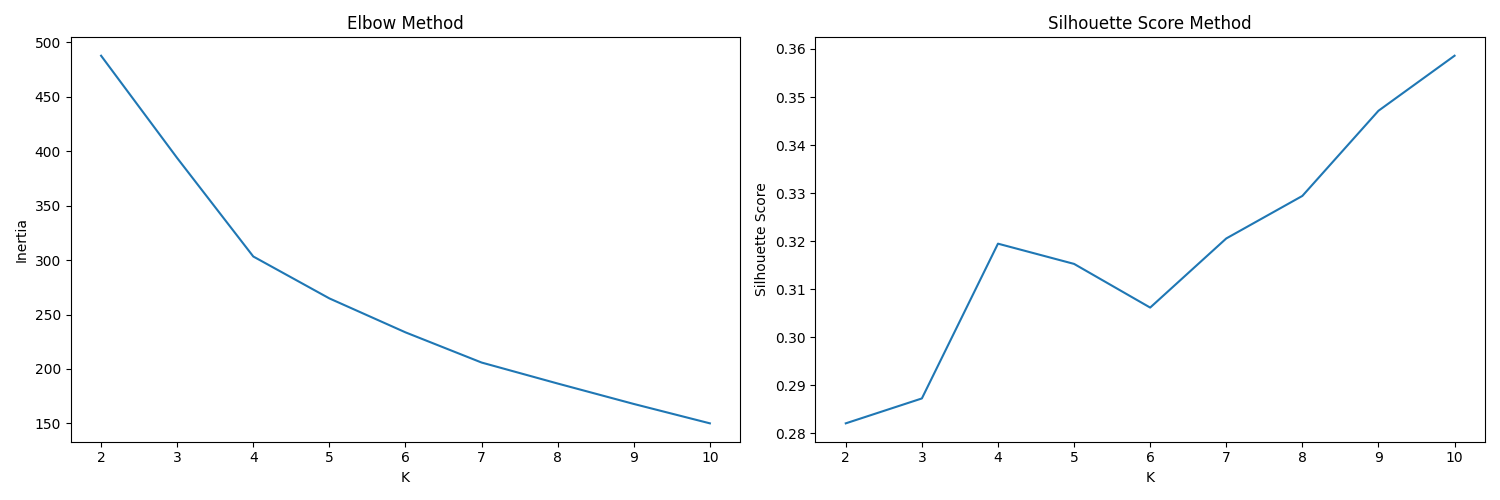

In [24]:
elbow_silhouette_graphic(data_analisys_scaled)

In [25]:
pipeline = Pipeline(
    steps=[
        ('preprocessing', preprossecing),
        ('clustering', KMeans(n_clusters=4, random_state=42, n_init=10))
    ]
)
pipeline.fit(data_analisys)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('Onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=4, n_init=10, random_state=42))])

In [26]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('Standard', StandardScaler(),
                                  ['Age', 'Annual Income (k$)',
                                   'Spending Score (1-100)']),
                                 ('Onehot', OneHotEncoder(), ['Gender'])]),
 'clustering': KMeans(n_clusters=4, n_init=10, random_state=42)}

In [27]:
pipeline['clustering'].labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [28]:
data_clustered = data_analisys.copy()


In [29]:
data_clustered['cluster'] = pipeline['clustering'].labels_

In [30]:
data_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


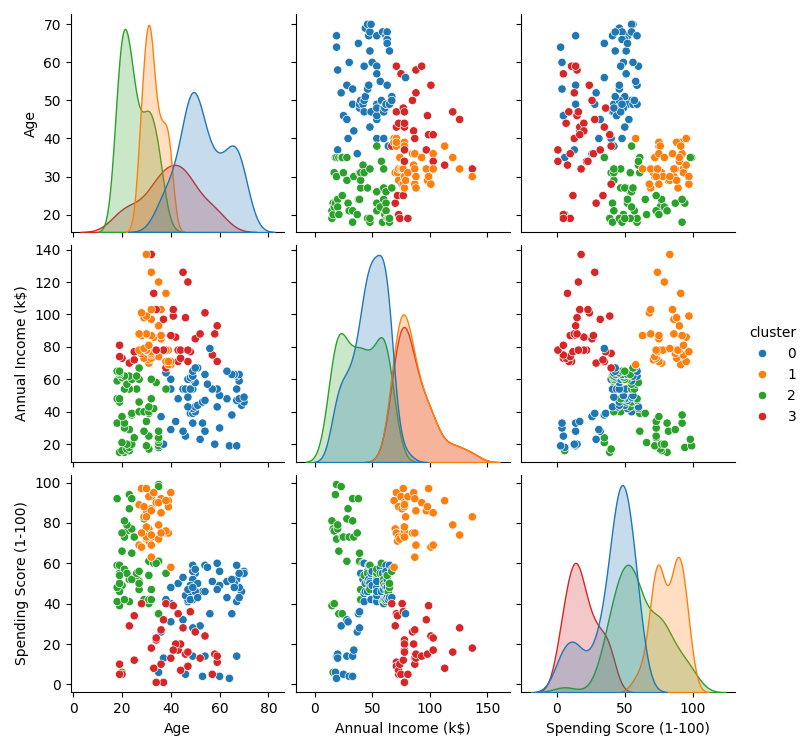

In [31]:
sns.pairplot(data_clustered, diag_kind='kde', hue='cluster', palette='tab10')
plt.show()

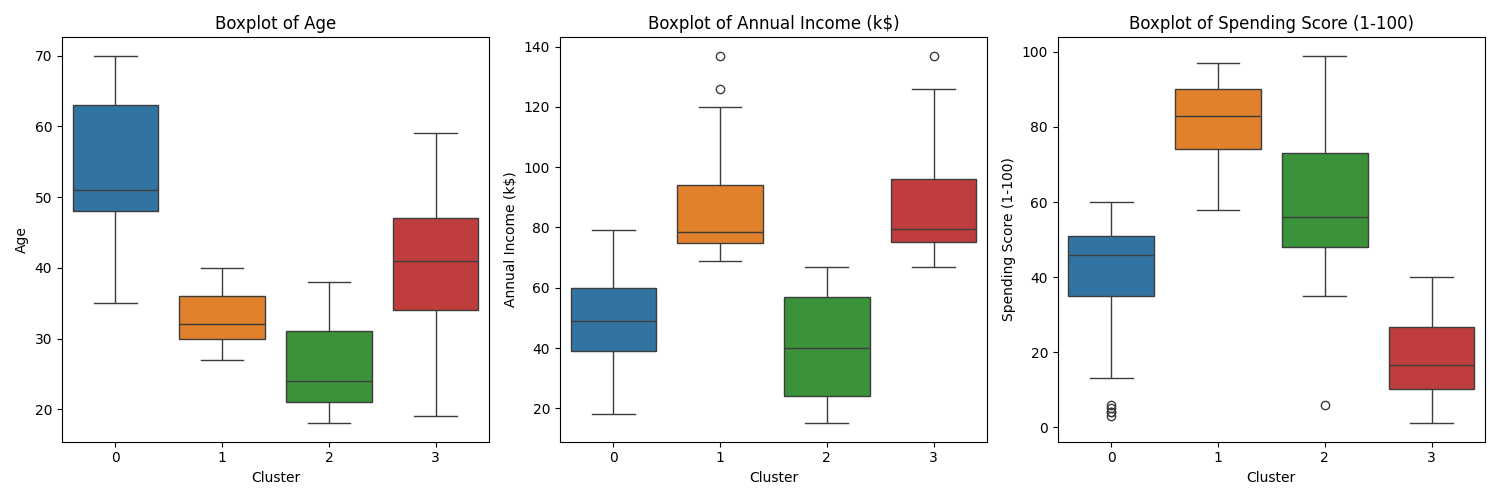

In [32]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axs = plt.subplots(ncols=len(numeric_cols), figsize=(15, 5))

for ax, col in zip(axs, numeric_cols):
    sns.boxplot(data=data_clustered, x='cluster', y=col, ax=ax,palette='tab10')
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(col)
    
plt.tight_layout()
plt.show()


In [33]:
data_clustered['cluster'].value_counts().sort_index()

cluster
0    65
1    40
2    57
3    38
Name: count, dtype: int64

In [34]:
data_clustered.groupby(['cluster','Gender']).size()

cluster  Gender
0        Female    38
         Male      27
1        Female    22
         Male      18
2        Female    34
         Male      23
3        Female    18
         Male      20
dtype: int64

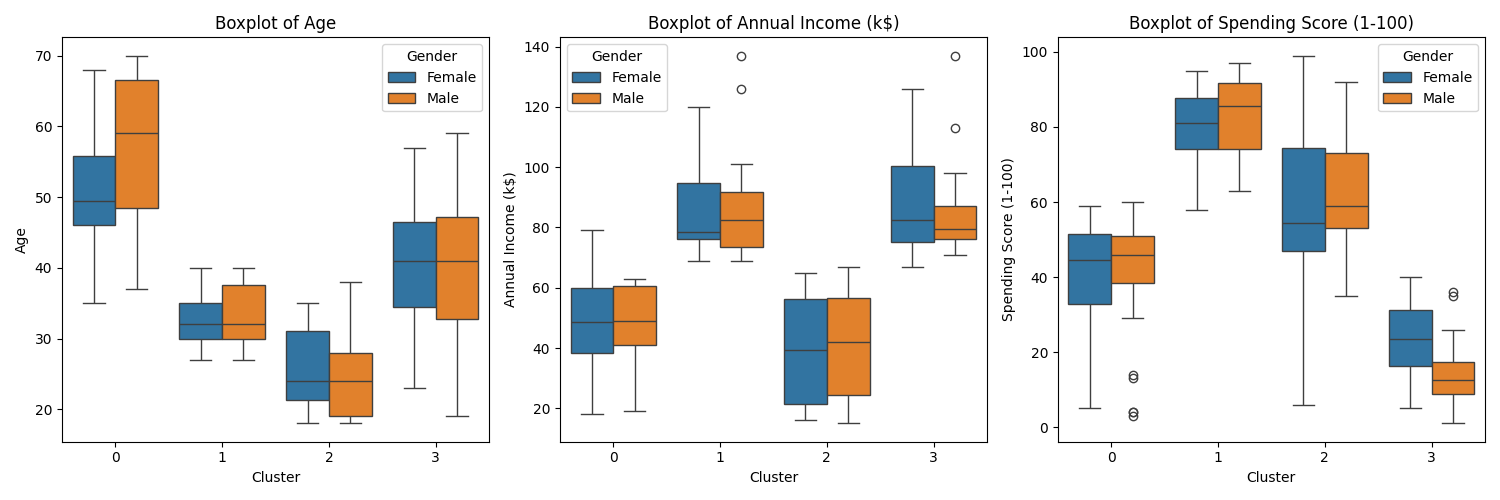

In [35]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axs = plt.subplots(ncols=len(numeric_cols), figsize=(15, 5))

for ax, col in zip(axs, numeric_cols):
    sns.boxplot(data=data_clustered, x='cluster', y=col, hue="Gender", ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(col)
    ax.legend(title='Gender')
    
plt.tight_layout()
plt.show()



In [36]:
pipeline['preprocessing'].get_feature_names_out()

array(['Standard__Age', 'Standard__Annual Income (k$)',
       'Standard__Spending Score (1-100)', 'Onehot__Gender_Female',
       'Onehot__Gender_Male'], dtype=object)

In [37]:
pipeline['clustering'].cluster_centers_

array([[ 1.06297508, -0.4946758 , -0.37865953,  0.58461538,  0.41538462],
       [-0.42880597,  0.97484722,  1.21608539,  0.55      ,  0.45      ],
       [-0.96249203, -0.78476346,  0.39202966,  0.59649123,  0.40350877],
       [ 0.0768659 ,  0.9971462 , -1.22042727,  0.47368421,  0.52631579]])

In [38]:
centroids = pipeline['clustering'].cluster_centers_[:,:-2]

In [39]:
from Functions import view_clusters

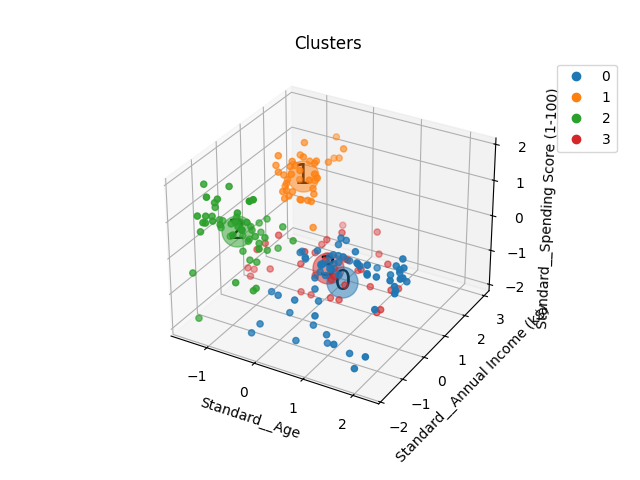

In [40]:
view_clusters(
    dataframe=data_analisys_scaled,
    colunas=['Standard__Age', 'Standard__Annual Income (k$)',
       'Standard__Spending Score (1-100)'],quantidade_cores=4,centroids=centroids,mostrar_pontos=True,coluna_clusters=data_clustered['cluster']
)
